# **Problem Statement:**
*Employee attrition (resignation or termination) increases costs due to hiring, training, and lost productivity. This project aims to predict whether an employee will leave the company based on factors like job satisfaction, salary, workload, and years at the company.*

-Goal:The goal is to predict employee attrition using various features. Accurate prediction helps companies take preventive actions and improve employee retention.

-This is a binary classification problem:
Leave (1) — Employee is likely to leave.Stay (0) —

*   Leave (1) — Employee is likely to leave
*   (0) — Employee is likely to remain.

Logistic Regression is used to make the prediction.



# **1.Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# **2.Loading The DataSet**

In [ ]:
data=pd.read_csv('EmployeeDataa.csv')

*Dataset Description:This dataset contains details of 1,470 employees with 35 features. There are no missing (null) values in the dataset. It includes both numerical and categorical columns such as Age, MonthlyIncome, Gender, JobRole, etc. The goal of the project is to predict employee attrition — whether an employee will stay or leave the company.*

# **3.Exploratory Data Analysis**

In [ ]:
data.shape


(1470, 35)

In [ ]:
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
data.dtypes

,0
Age,int64
Attrition,object
BusinessTravel,object
DailyRate,int64
Department,object
DistanceFromHome,int64
Education,int64
EducationField,object
EmployeeCount,int64
EmployeeNumber,int64


In [ ]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
data.describe(include="object")

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


In [ ]:
data.isnull().sum()

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


# **4.Data Plotting For Analysis**

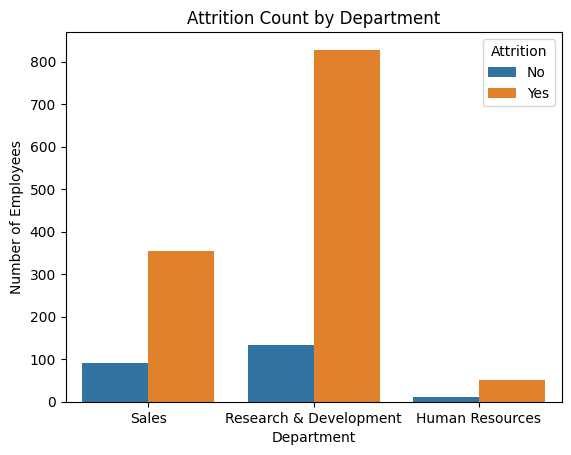

In [ ]:
sns.countplot(data=data, x='Department', hue='Attrition')
plt.title("Attrition Count by Department")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.legend(title='Attrition',labels=['No', 'Yes'])
plt.show()

<ipython-input-12-ac6c42ca4d71>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data[data['OverTime'] == 'Yes'], x='Attrition', palette='pastel')


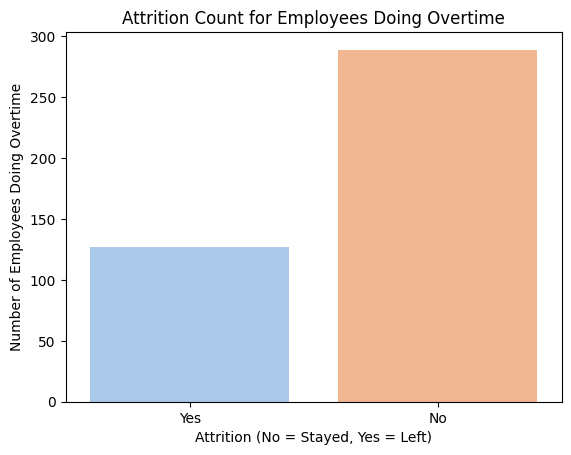

In [ ]:
sns.countplot(data=data[data['OverTime'] == 'Yes'], x='Attrition', palette='pastel')
plt.title("Attrition Count for Employees Doing Overtime")
plt.xlabel("Attrition (No = Stayed, Yes = Left)")
plt.ylabel("Number of Employees Doing Overtime")
plt.show()


<ipython-input-13-a5229dbb0272>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='MonthlyIncome',palette='Greens')


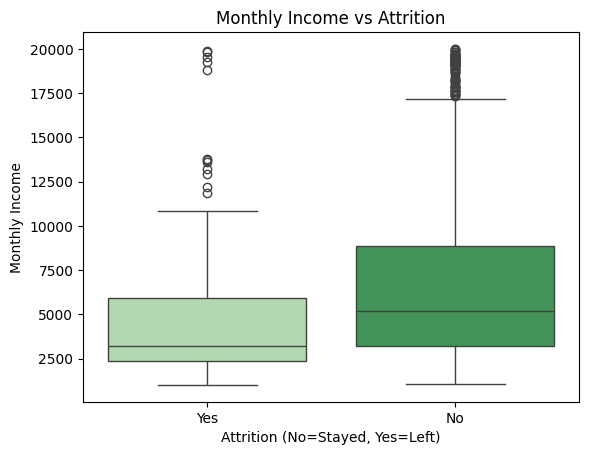

In [ ]:

sns.boxplot(data=data, x='Attrition', y='MonthlyIncome',palette='Greens')
plt.title("Monthly Income vs Attrition")
plt.xlabel("Attrition (No=Stayed, Yes=Left)")
plt.ylabel("Monthly Income")
plt.show()


<ipython-input-14-423d0dd32315>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Attrition', y='Age', palette="Reds")


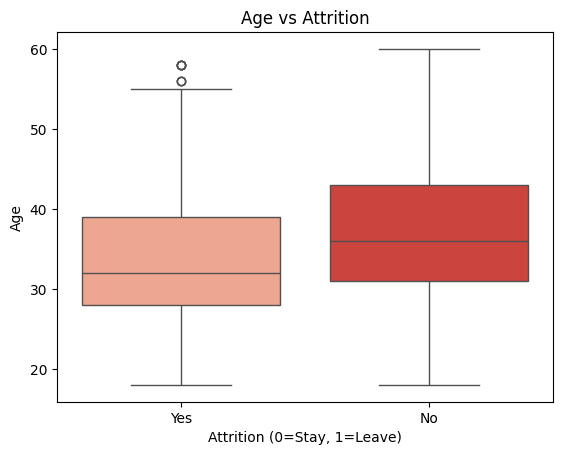

In [ ]:
sns.boxplot(data=data, x='Attrition', y='Age', palette="Reds")
plt.title("Age vs Attrition")
plt.xlabel("Attrition (0=Stay, 1=Leave)")
plt.ylabel("Age")
plt.show()

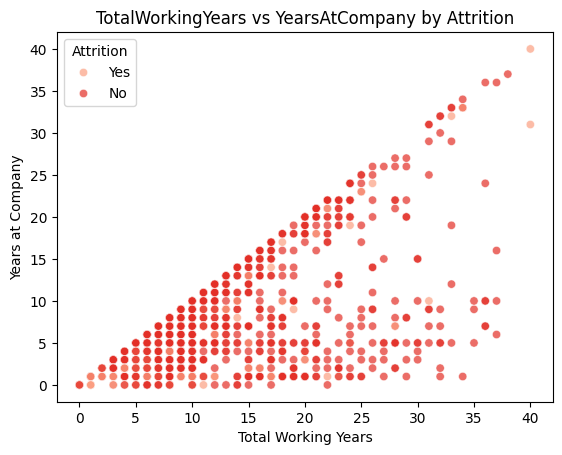

In [ ]:
sns.scatterplot(
    data=data,
    x='TotalWorkingYears',
    y='YearsAtCompany',
    hue='Attrition',
    alpha=0.7,palette="Reds"
)
plt.title("TotalWorkingYears vs YearsAtCompany by Attrition")
plt.xlabel("Total Working Years")
plt.ylabel("Years at Company")
plt.show()

# **5.Data Preprocessing:**

Used Label Encoding to deal Categorical columns with two classes like Gender and OverTime while
For multi-class categorical columns like BusinessTravel, JobRole, and EducationField, One-Hot Encoding is applied. *italicized text*

In [ ]:
# Dropping unnecessary columns
columnstodrop= [
    'EmployeeCount',
    'EmployeeNumber',
    'Over18',
    'StandardHours',
    'DailyRate',
    'MonthlyRate',
    'HourlyRate'
]

data.drop(columnstodrop, axis=1, inplace=True)


In [ ]:
data.shape


(1470, 28)

In [ ]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [ ]:
data.select_dtypes(include='object').columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime'],
      dtype='object')

In [ ]:
#Label encoding for converting categorical data into numeric format
data['Attrition'] = data['Attrition'].map({'No': 0, 'Yes': 1})
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['OverTime'] = data['OverTime'].map({'No': 0, 'Yes': 1})


In [ ]:
#One hot encoding for converting multicategorical data into numeric format
data = pd.get_dummies(data, columns=['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'], drop_first=True)


In [ ]:
data.sample(10)

,Age,Attrition,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
1311,18,0,14,3,2,1,3,1,3,1514,...,False,False,False,False,False,True,False,False,False,True
200,27,0,1,1,3,0,2,2,1,4298,...,False,False,False,True,False,False,False,False,True,False
114,34,0,6,4,3,1,2,2,2,4505,...,False,False,False,False,False,True,False,False,False,False
60,32,0,1,3,1,0,3,2,4,6162,...,False,False,False,True,False,False,False,False,True,False
1221,45,0,1,1,3,0,2,3,3,10748,...,False,False,False,False,False,False,False,False,True,False
539,50,0,8,4,4,0,3,1,2,3875,...,False,False,False,False,False,False,False,True,True,False
1241,32,0,19,3,4,0,1,3,3,9610,...,False,False,False,False,False,False,True,False,True,False
1019,36,0,16,4,3,1,2,2,1,5647,...,False,False,False,False,False,False,True,False,True,False
1443,42,0,2,3,1,0,3,5,3,18880,...,False,False,True,False,False,False,False,False,True,False
1031,46,1,9,3,1,0,3,3,4,10096,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
data.shape

(1470, 42)

In [ ]:
data.columns

Index(['Age', 'Attrition', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'JobRole_Human Resources',
       'JobRole_Laboratory Technician', 'JobRole_Manager',
       'JobRole_Manufacturing Director', 'JobRole_Research Director',
       'JobRole_Research Scientist', 'JobRole_Sales Ex

# **6.Select Features and Target**

In [ ]:
# Splitting dataset into independent and dependent features

X = data.drop('Attrition', axis=1)
y = data['Attrition']


In [ ]:
X

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,1,3,2,4,5993,8,...,False,False,False,False,False,False,True,False,False,True
1,49,8,1,3,0,2,2,2,5130,1,...,False,False,False,False,False,True,False,False,True,False
2,37,2,2,4,0,2,1,3,2090,6,...,False,True,False,False,False,False,False,False,False,True
3,33,3,4,4,1,3,1,3,2909,1,...,False,False,False,False,False,True,False,False,True,False
4,27,2,1,1,0,3,1,2,3468,9,...,False,True,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,0,4,2,4,2571,4,...,False,True,False,False,False,False,False,False,True,False
1466,39,6,1,4,0,2,3,1,9991,4,...,False,False,False,False,False,False,False,False,True,False
1467,27,4,3,2,0,4,2,2,6142,1,...,False,False,False,True,False,False,False,False,True,False
1468,49,2,3,4,0,2,2,2,5390,2,...,False,False,False,False,False,False,True,False,True,False


In [ ]:
y

,Attrition
0,1
1,0
2,1
3,0
4,0
...,...
1465,0
1466,0
1467,0
1468,0


# **6.Split Data into Training and Testing Sets**

In [ ]:
from sklearn.model_selection import train_test_split

# 75% training, 25% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# **7.Model Training**

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# **8.Model Testing and Prediction**

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# **9. Model Evaluation**

In [ ]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 0.8411978221415608
Testing Accuracy: 0.8586956521739131


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_test_pred))
conf_matrix = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix:\n", conf_matrix)

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92       320
           1       0.36      0.10      0.16        48

    accuracy                           0.86       368
   macro avg       0.62      0.54      0.54       368
weighted avg       0.81      0.86      0.82       368

Confusion Matrix:
 [[311   9]
 [ 43   5]]


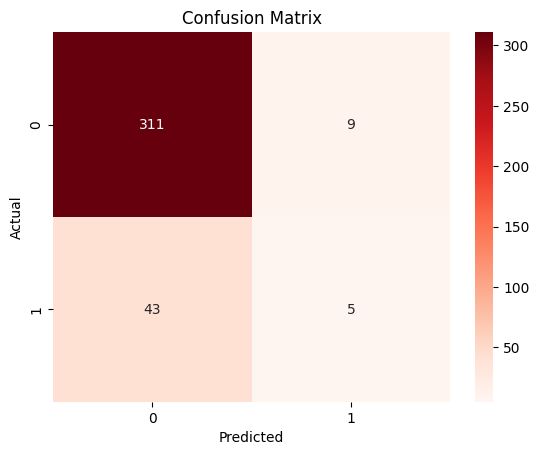

In [ ]:
sns.heatmap(conf_matrix, annot=True, cmap="Reds", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

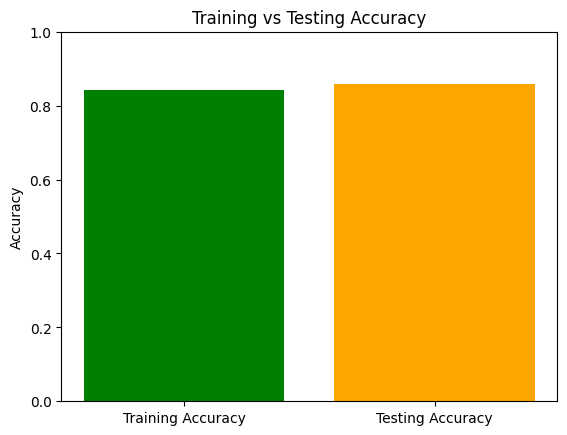

In [ ]:
plt.bar(['Training Accuracy', 'Testing Accuracy'], [train_accuracy, test_accuracy], color=['green', 'orange'])
plt.ylim(0, 1)
plt.title("Training vs Testing Accuracy")
plt.ylabel("Accuracy")
plt.show()

**1.What did you learn from the dataset?**
Ans:The dataset shows that factors like job satisfaction, overtime, monthly income, and years at the company influence employee attrition.



**2.Which features were most important?**
Ans:OverTime, JobSatisfaction, MonthlyIncome, and YearsAtCompany were the most important features in predicting attrition.

**3.Was the model accurate? Why or why not?**
Ans:Yes, the model was reasonably accurate because the features used had a strong correlation with employee attrition and the dataset was clean with no missing values.